# Gradient Descent with Adaptive Gradients

This notebook implements Gradient Descent with AdaGrad and RMSProp Optimizers from scratch and visually compares the difference in optimization

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
class GradientDescent():
    def __init__(self, lr = 1, iterations = 1000, epsilon = 1e-6, optimizer = 'regular'):
        self.learning_rate = lr
        self.iterations = iterations
        self.eps = epsilon
        self.optimizer = optimizer
        if self.optimizer == 'rmsprop':
            self.beta = 0.9
            
        self.step_sizes = []

    def h(self, X, theta):
        return np.dot(X, theta)

    def J(self, X, y, theta):
        m = X.shape[0]
        return (1 / m) * np.dot((self.h(X, theta) - y).T, self.h(X, theta) - y)

    def adagrad(self, theta, dt):
        self.g += dt**2
        self.step_sizes.append(self.learning_rate/(np.sqrt(self.g + self.eps)))
        theta = theta - self.learning_rate/(np.sqrt(self.g + self.eps)) * dt
        return theta
    
    def rmsprop(self, theta, dt):
        self.g = self.beta * self.g + (1 - self.beta) * dt**2
        self.step_sizes.append(self.learning_rate/(np.sqrt(self.g)))
        theta = theta - self.learning_rate/(np.sqrt(self.g)) * dt
        return theta
    
    def train(self, X, y, theta):
        m = X.shape[1]
        cost = []
        thetas = []
        it = []

        epochs = 0
        title = f'{self.optimizer} Gradient Descent'
        self.g = np.zeros((m, 1))
        
        for e in range(self.iterations):

            for i in range(0, X.shape[0]):
                
                dt = (2*X[i] * (self.h(X[i], theta) - y[i])).reshape(2, 1)

                if self.optimizer == 'adagrad':
                    theta = self.adagrad(theta, dt)
                    
                elif self.optimizer == 'rmsprop':
                    theta = self.rmsprop(theta, dt)
                    
                else:
                    self.step_sizes.append(self.learning_rate * dt)
                    theta = theta - self.learning_rate * dt

                epochs += 1

                thetas.append(theta)
                cost.append(self.J(X, y, theta)[0])
                it.append(epochs)

        weight_plot(thetas, it, title)
        cost_plot(cost, it, title)
        step_plot(self.step_sizes, it, title)

        return theta

In [64]:
def noise(arr):
    arr = arr + np.random.randn(arr.shape[0]) * 15
    return arr

In [65]:
def normalize(data):
    for i in range(0, data.shape[1]):
        data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:,i])

In [66]:
def plot_data(data, title):
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(data[:, 0], data[:, -1], c = 'mediumseagreen', alpha = 0.5)
    plt.title(title)
    
    plt.show()

In [67]:
def cost_plot(cost, iterations, title):
    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.plot(iterations, cost)
    plt.title(title)
    
    plt.show()

In [68]:
def weight_plot(w, it, title):
    
    t = []
    b = []
    
    for i in w:
    
        t.append(i[1])
        b.append(i[0])
    
    plt.xlabel('Iterations')
    plt.ylabel('Weights')
    plt.plot(it, t, color = 'blue', label = 'Weight')
    plt.plot(it, b, color = 'red', label = 'Bias')
    plt.legend()
    plt.title(title)
    plt.show()

In [69]:
def step_plot(w, it, title):
    
    t = []
    b = []
    
    for i in w:
    
        t.append(i[1])
        b.append(i[0])
    
    plt.xlabel('Iterations')
    plt.ylabel('Steps')
    plt.plot(it, t, color = 'blue', label = 'Steps in Theta[1]')
    plt.plot(it, b, color = 'red', label = 'Steps in Theta[0]')
    plt.legend()
    plt.title(title)
    plt.show()

In [70]:
x = noise(np.arange(150, 220, 0.0625))
y = noise(np.arange(40, 110, 0.0625))

data = np.column_stack((x, y))
np.random.shuffle(data)

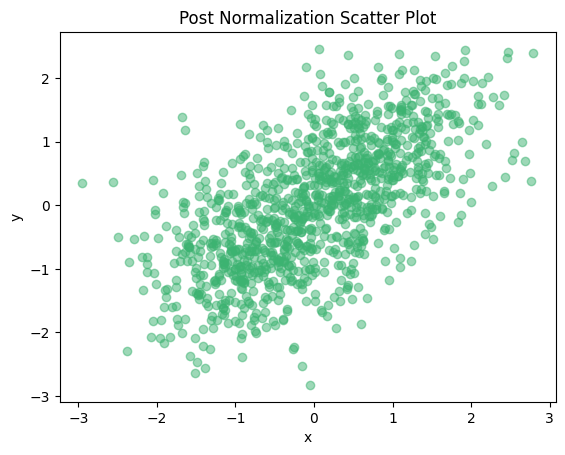

In [71]:
normalize(data)
plot_data(data, 'Post Normalization Scatter Plot')

In [72]:
X = data[:, 0].reshape((1120, 1))
y = data[:, -1].reshape((1120, 1))

b = np.ones((X.shape[0], 1), dtype = 'float')
X = np.column_stack((b, X))

print(f'X shape: {X.shape}\t', f'y shape: {y.shape}')

X shape: (1120, 2)	 y shape: (1120, 1)


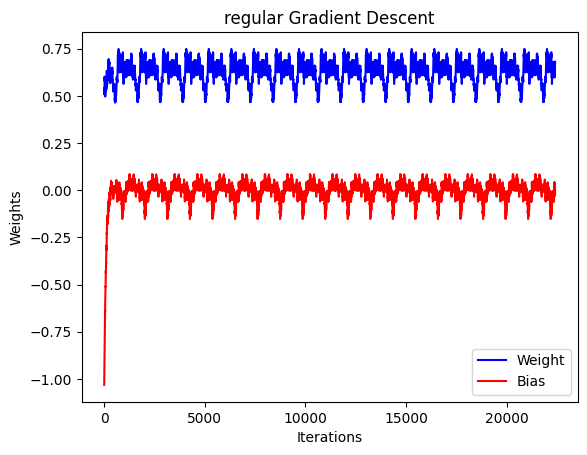

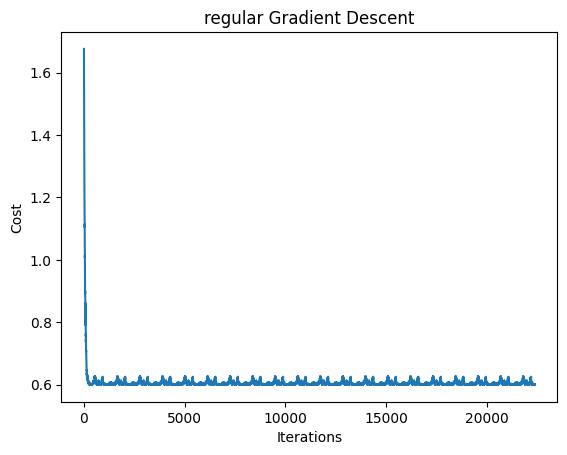

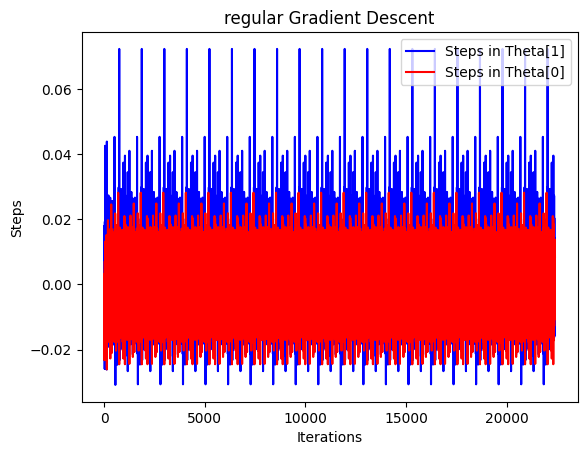

array([[-0.01266276],
       [ 0.68035258]])

In [73]:
theta = np.random.randn(2,1)
gd = GradientDescent(lr=0.005, iterations=20)
gd.train(X, y, theta)

## AdaGrad Optimizer

1) AdaGrad is a modification of Stochastic Gradient Descent where the step sizes change for each calculation of gradient.

2) This allows for descents in different dimensions to have respectively different step sizes.

3) An advantage of AdaGrad is quicker optimization for complex n-dimensional first order differentiable objective functions.

Its disadvantage is that since the learning is being scaled by the sum of Gradients, the step size shrinks close to zero.

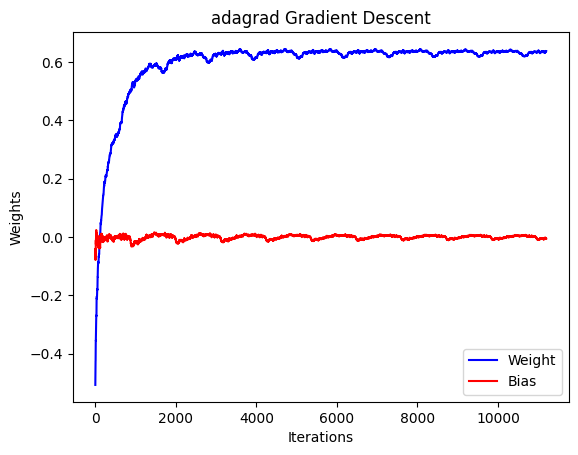

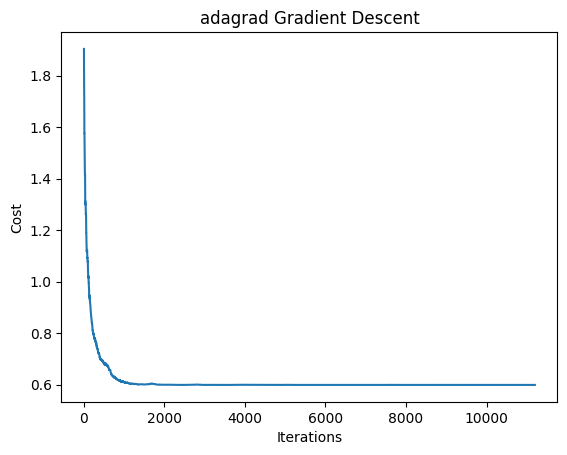

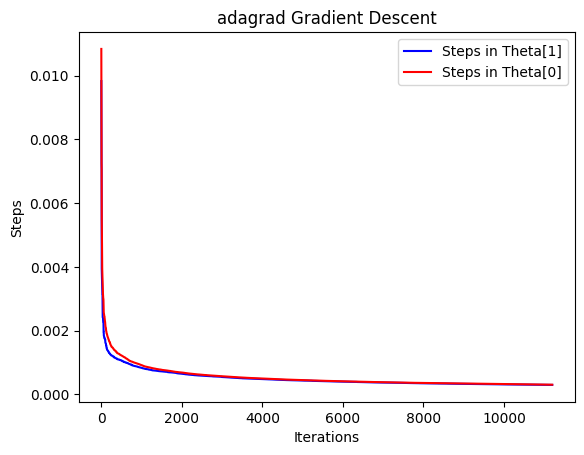

array([[-0.00536597],
       [ 0.63694718]])

In [77]:
theta = np.random.randn(2,1)
ada = GradientDescent(lr=0.05, iterations=10, optimizer='adagrad')
ada.train(X, y, theta)

## RMSProp Optimizer

1) RMSProp is a modification to AdaGrad which provides adaptive gradients for Gradient Descent.
2) Unlike AdaGrad, RMSProp scales the learning rate by the moving average of the Gradients, which avoids the problem of step size approaching zero.

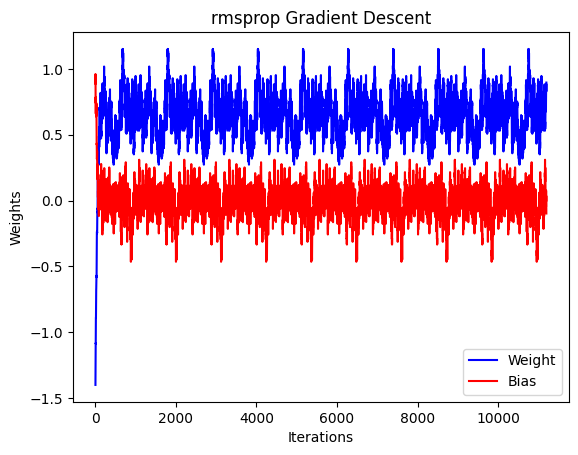

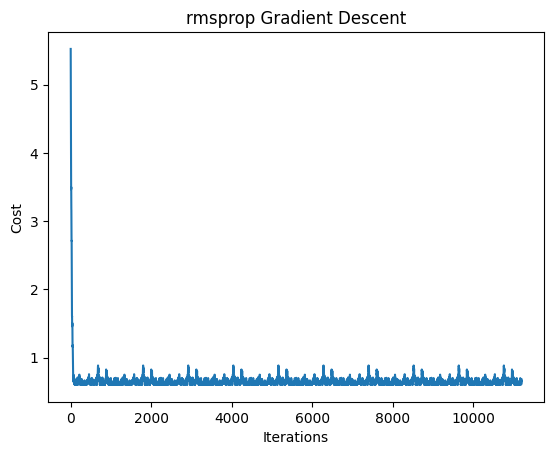

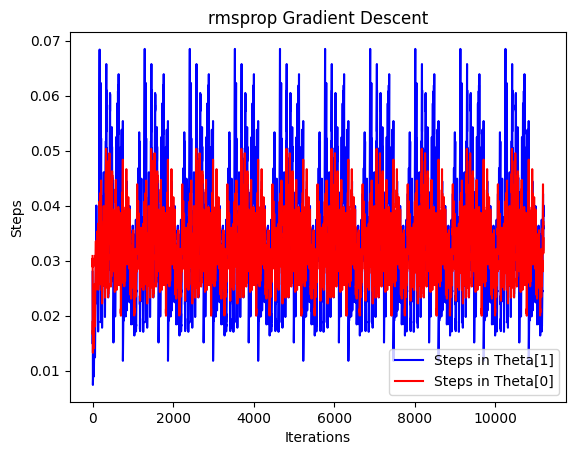

array([[-0.09814805],
       [ 0.89634942]])

In [79]:
theta = np.random.randn(2,1)
rms = GradientDescent(lr=0.05, iterations=10, optimizer='rmsprop')
rms.train(X, y, theta)

### Conclusion

It's evident that RMSProp converges to the minima of the cost function quicker than AdaGrad does. This is due to RMSProp not shrinking the learning rate to zero hence allowing for comparitvely bigger steps to be taken for learning.

While this notebook shows the implementation of the RMSProp through Stochastic Gradient Descent, I believe RMSProp would show even better results when used with Mini-Batch Gradient